# rdt must << 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
%matplotlib inline

In [2]:
def Fake_Spike_Activation_function(r):
    rstate=np.zeros(len(r))
    edges = np.append(min(r), np.array([np.std(r),2*np.std(r),3*np.std(r)])+np.mean(r));
    for i in range(4):
        for j in np.where(r>=edges[i])[0]:
            rstate[j] = i
    return rstate

In [3]:
def Poisson_Process_burst(r, mean_r):
    spike_per_burst = 1
    rstate=np.zeros(len(r))
    rdt = r/sum(r)*len(r)*mean_r
    if max(rdt)>=1:
        spike_per_burst = max(rdt)
        rdt = rdt/max(rdt)
        print('burst!')
    for j in range(len(r)):
        if np.random.rand() <= rdt[j]:
            rstate[j] = np.random.poisson(spike_per_burst)
    return rstate

In [4]:
# activation function
def nA(x,theta=0):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]- theta>0:
            y[i]= x[i]-theta
    return(y)

In [5]:
def Spike_Time_Generater(rdt, dt, Garmma=1):
    rdt = rdt*Garmma
    if max(rdt)>=1:
        rdt = rdt.repeat(int(max(rdt)+1))
        dt = dt/int(max(rdt)+1)
    Spike_time = []
    
    counter = 0
    post_remainer_c = 0
    p = 1
    while True:
        the_random_number = np.random.rand()
        while (the_random_number < p and counter < len(rdt)):
            p *= np.exp(-rdt[counter])
            counter += 1
        if counter >= len(rdt):
            break
        remainer_c = -np.log(p/the_random_number)/rdt[counter-1]
        Spike_time.append(dt*(counter-remainer_c))
        p = np.exp(-remainer_c*rdt[counter-1])
    return Spike_time[::Garmma]

In [20]:
Tot=10000
dt=0.01
T=np.arange(dt,Tot,dt)
# OU ; input
tau= 1
D = 27*10**5
OU=np.zeros(len(T))
mu, sigma = 0, 1
for i in range(len(T)-1):
    OU[i+1]=OU[i]*(1-dt/tau)+math.sqrt(D*dt)*np.random.normal(mu,sigma)
    
# filtering for OUSmoothed
cutoffFreq = 1
b, a = signal.butter(2, 2*cutoffFreq*dt, btype='low', analog=False)
LPOU = signal.filtfilt(b, a, OU)

LPOU = ((LPOU-min(LPOU))/(max(LPOU)-min(LPOU))-0.5)*0.1

In [21]:
rr = np.random.randn(1000)
rr = LPOU[100:9100] - np.mean(LPOU[100:9100])
rr[np.where(rr<0)] = 0
rr = rr/sum(rr)*len(rr)*0.1
test_Spike = Spike_Time_Generater(rr, 1, 1)

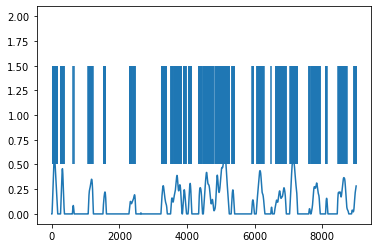

In [22]:
plt.eventplot(test_Spike)
plt.plot(rr)

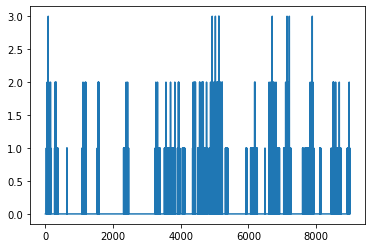

In [24]:
Binning_Spike, _ = np.histogram(test_Spike, np.arange(0,9001))
plt.plot( Binning_Spike)
# plot.plot(np.correlate(rr, Binning_Spike))

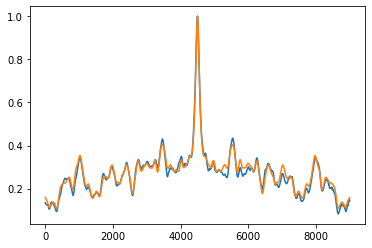

In [25]:
Xcorr_Sx = np.correlate(rr, Binning_Spike, 'same')
Xcorr_xx = np.correlate(rr, rr, 'same')
plt.plot(Xcorr_Sx/max(Xcorr_Sx))
plt.plot(Xcorr_xx/max(Xcorr_xx))
# plt.xlim([450,550])

In [26]:
(np.argmax(Xcorr_Sx)-np.argmax(Xcorr_xx))

0

In [27]:
test_Spike2 =  np.random.poisson(Fake_Spike_Activation_function( rr))

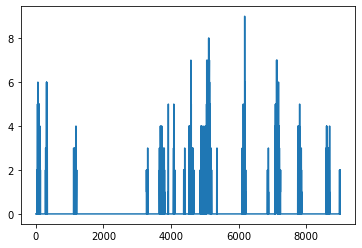

In [28]:
plt.plot(test_Spike2)

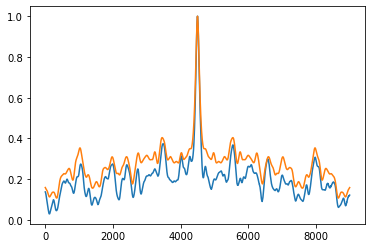

In [29]:
Xcorr_Sx = np.correlate(rr, test_Spike2, 'same')
Xcorr_xx = np.correlate(rr, rr, 'same')
plt.plot(Xcorr_Sx/max(Xcorr_Sx))
plt.plot(Xcorr_xx/max(Xcorr_xx))
# plt.xlim([450,550])

In [30]:
test_Spike3 = Poisson_Process_burst(rr, 0.1)

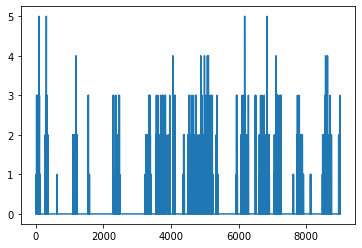

In [31]:
plt.plot(test_Spike3)

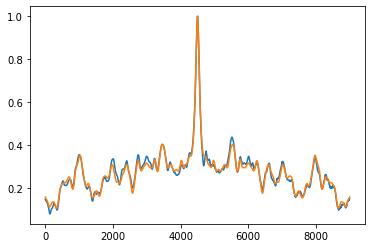

In [32]:
Xcorr_Sx = np.correlate(rr, test_Spike3, 'same')
Xcorr_xx = np.correlate(rr, rr, 'same')
plt.plot(Xcorr_Sx/max(Xcorr_Sx))
plt.plot(Xcorr_xx/max(Xcorr_xx))